In [2]:
import numpy as np
from PIL import Image as Img
import matplotlib.pyplot as plt
import cv2
from skimage.io import imread, imshow
import skimage.morphology as ski
import scipy.ndimage as sci
import math

/opt/conda/lib/python3.9/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


Text(0.5, 1.0, 'opened')

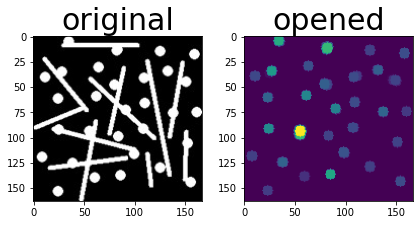

In [103]:
circles = cv2.imread('circles_lines.jpg')
gray = cv2.cvtColor(circles, cv2.COLOR_BGR2GRAY)

Y, X = np.ogrid[:12, :12]
center = (6, 6)
dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
mask = dist_from_center <= 5

opened = ski.opening(gray[:], mask)
fig, axs = plt.subplots(1, 2)
fig.tight_layout()
axs[0].imshow(circles)
axs[0].set_title('original', fontsize=30)
axs[1].imshow(opened)
axs[1].set_title('opened', fontsize=30)

number of circles 30


Text(0.5, 1.0, 'labeled')

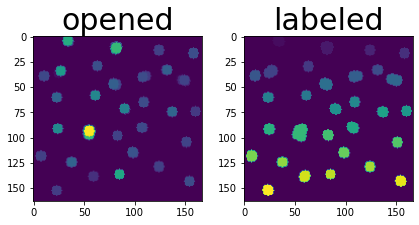

In [104]:
labeled,num = sci.measurements.label(opened)
print("number of circles", num)

fig, axs = plt.subplots(1, 2)
fig.tight_layout()
axs[0].imshow(opened)
axs[0].set_title('opened', fontsize=30)
axs[1].imshow(labeled)
axs[1].set_title('labeled', fontsize=30)

In [116]:
miny = [-1 for _ in range(num+1)]
maxy = [-1 for _ in range(num+1)]
minx = [-1 for _ in range(num+1)]
maxx = [-1 for _ in range(num+1)]
for h in range(1, num+1):
    for i in range(len(labeled)):
        for j in range(len(labeled[0])):
            if labeled[i][j] == h:
                if miny[h] == -1:
                    miny[h] = j
                    maxy[h] = j
                if minx[h] == -1:
                    minx[h] = i
                    maxx[h] = i
                if j > maxy[h]:
                    maxy[h] = j
                if i > maxx[h]:
                    maxx[h] = i

for h in range(1, num+1):
    leny = maxy[h] - miny[h]
    lenx = maxx[h] - minx[h]
    center = (minx[h] + int(lenx/2),miny[h] + int(leny/2))
    area = pow((leny+lenx)/2, 2) * math.pi
    print("circle", h, "centered at", center, ", area =", area)
    

circle 1 centered at (5, 35) , area = 314.1592653589793
circle 2 centered at (11, 84) , area = 346.3605900582747
circle 3 centered at (13, 126) , area = 201.06192982974676
circle 4 centered at (16, 160) , area = 201.06192982974676
circle 5 centered at (29, 65) , area = 201.06192982974676
circle 6 centered at (34, 30) , area = 283.5287369864788
circle 7 centered at (33, 134) , area = 201.06192982974676
circle 8 centered at (38, 13) , area = 201.06192982974676
circle 9 centered at (39, 112) , area = 314.1592653589793
circle 10 centered at (43, 150) , area = 415.4756284372501
circle 11 centered at (47, 83) , area = 314.1592653589793
circle 12 centered at (58, 63) , area = 176.71458676442586
circle 13 centered at (60, 26) , area = 201.06192982974676
circle 14 centered at (64, 111) , area = 201.06192982974676
circle 15 centered at (71, 92) , area = 254.46900494077323
circle 16 centered at (73, 162) , area = 201.06192982974676
circle 17 centered at (74, 139) , area = 226.98006922186255
circl

In [117]:
print(mask)

[[False False False False False False False False False False False False]
 [False False False False False False  True False False False False False]
 [False False False  True  True  True  True  True  True  True False False]
 [False False  True  True  True  True  True  True  True  True  True False]
 [False False  True  True  True  True  True  True  True  True  True False]
 [False False  True  True  True  True  True  True  True  True  True False]
 [False  True  True  True  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True  True  True False]
 [False False  True  True  True  True  True  True  True  True  True False]
 [False False  True  True  True  True  True  True  True  True  True False]
 [False False False  True  True  True  True  True  True  True False False]
 [False False False False False False  True False False False False False]]


Text(0.5, 1.0, 'opened')

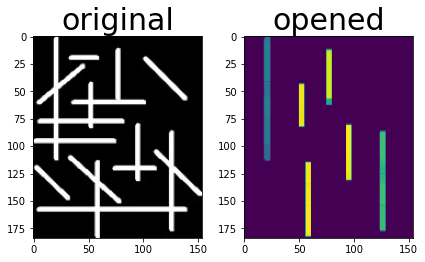

In [3]:
lines = cv2.imread('lines.jpg')
grays = cv2.cvtColor(lines, cv2.COLOR_BGR2GRAY)
masks = np.ones((15, 5), dtype = np.uint8)

openeds = ski.opening(grays[:], masks)
fig, axs = plt.subplots(1, 2)
fig.tight_layout()
axs[0].imshow(lines)
axs[0].set_title('original', fontsize=30)
axs[1].imshow(openeds)
axs[1].set_title('opened', fontsize=30)

number of circles 6


Text(0.5, 1.0, 'labeled')

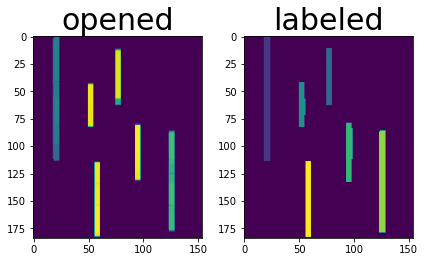

In [4]:
labeleds,nums = sci.measurements.label(openeds)
print("number of circles", nums)

fig, axs = plt.subplots(1, 2)
fig.tight_layout()
axs[0].imshow(openeds)
axs[0].set_title('opened', fontsize=30)
axs[1].imshow(labeleds)
axs[1].set_title('labeled', fontsize=30)

In [5]:
miny = [-1 for _ in range(nums+1)]
maxy = [-1 for _ in range(nums+1)]
minx = [-1 for _ in range(nums+1)]
maxx = [-1 for _ in range(nums+1)]
for h in range(1, nums+1):
    for i in range(len(labeleds)):
        for j in range(len(labeleds[0])):
            if labeleds[i][j] == h:
                if miny[h] == -1:
                    miny[h] = j
                    maxy[h] = j
                if minx[h] == -1:
                    minx[h] = i
                    maxx[h] = i
                if j > maxy[h]:
                    maxy[h] = j
                if i > maxx[h]:
                    maxx[h] = i

for h in range(1, nums+1):
    leny = maxy[h] - miny[h]
    lenx = maxx[h] - minx[h]
    center = (minx[h] + int(lenx/2),miny[h] + int(leny/2))
    length = leny
    print("circle", h, "centered at", center, ", length =", length)

circle 1 centered at (56, 21) , length = 4
circle 2 centered at (36, 77) , length = 4
circle 3 centered at (62, 52) , length = 5
circle 4 centered at (105, 95) , length = 5
circle 5 centered at (132, 126) , length = 4
circle 6 centered at (148, 58) , length = 4


In [6]:
print(masks)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
